In [1]:
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy
import scipy.stats as stats
from natsort import index_natsorted
import tensorflow as tf
import os
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import heartpy as hp
from biosppy import storage
from biosppy.signals import ecg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from systole.plots import plot_raw
from systole.detection import ecg_peaks
from systole import import_dataset1, import_ppg
from systole.utils import input_conversion
import neurokit2 as nk
from bokeh.io import output_notebook
from bokeh.plotting import show
from systole.correction import correct_rr, correct_peaks

In [2]:
def CSVprocess(dataframe):
    EKG11_X = (dataframe[['X [s]']].to_numpy()).ravel()
    EKG11_Y = (dataframe[['EKG sensor 11: EKG 11 [V]']].to_numpy()).ravel()

    EKG12_X = (dataframe[['X [s].7']].to_numpy()).ravel()
    EKG12_Y = (dataframe[['EKG sensor 12: EKG 12 [V]']].to_numpy()).ravel()

    EKG13_X = (dataframe[['X [s].14']].to_numpy()).ravel()
    EKG13_Y = (dataframe[['EKG sensor 13: EKG 13 [V]']].to_numpy()).ravel()

    EKG14_X = (dataframe[['X [s].21']].to_numpy()).ravel()
    EKG14_Y = (dataframe[['EKG sensor 14: EKG 14 [V]']].to_numpy()).ravel()

    sr = len(EKG11_X)/EKG11_X[-1]
    return EKG11_Y,EKG12_Y,EKG13_Y,EKG14_Y,sr

In [3]:
def neurokit(E11,E12,E13,E14,sr):
    signals11, info = nk.ecg_process(E11, sampling_rate=sr)
    signals12, info2 = nk.ecg_process(E12, sampling_rate=sr)
    signals13, info3 = nk.ecg_process(E13, sampling_rate=sr)
    signals14, info4 = nk.ecg_process(E14, sampling_rate=sr)
    return signals11, signals12, signals13, signals14

In [4]:
def HRPlot(fn,sig,sample_rate,tag):
    x_axis = np.linspace(0, sig.shape[0] / sample_rate, sig.shape[0])
    rate_mean = sig["ECG_Rate"].mean()
    plt.figure(figsize=(20, 15))
    plt.xlabel('Time(s)')
    plt.ylabel('Beats per minute (BPM)')
    plt.title('Heart Rate'+tag)
    plt.plot(x_axis, sig["ECG_Rate"], color="#FF5722", label="Rate", linewidth=1.5)
    plt.axhline(y=rate_mean, label="Mean", linestyle="--", color="#FF9800")
    plt.legend(loc="upper right")
    plt.savefig(fn + tag + '_HR'+'.png')

In [5]:
def RR(fn,sig,sample_rate,tag):
    RRp = (sig[sig.ECG_R_Peaks==1].index).to_numpy()
    RR = np.diff(RRp)/sr * 1000
    rr_correction = correct_rr(RR, n_iterations=5)
    RR_s = rr_correction['clean_rr'] / 1000
    np.savetxt(tag + '_' + fn + '_rr'+'.csv', RR_s, delimiter=",")

In [6]:
def ult(sig):
    Rmin = sig['ECG_Rate'].min()
    Rmax = sig['ECG_Rate'].max()
    Rmean = sig['ECG_Rate'].mean()
    Rdev = sig['ECG_Rate'].std()
    return Rmin,Rmax,Rmean,Rdev

In [7]:
filtered_files = []
for file in os.listdir('./test'):
    if file.endswith('.' + 'csv'):
        filtered_files.append(file)

Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
... correcting 2 short interval(s).
... correcting 1 long interval(s).
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
... correcting 1 short interval(s).
... correcting 3 long interval(s).
 - Iteration 2 - 
... correcting 2 long interval

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
... correcting 1 short interval(s).
... correcting 2 long interval(s).
 - Iteration 2 - 
... correcting 2 long interval(s).
 - Iteration 3 - 
... correcting 2 long interval(s).
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
... correcting 1 long interval(s).
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
... correcting 1 short interval(s).
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 
Cleaning the RR interval time series using 5 iterations.
 - Iteration 1 - 
... correcting 1 long interval(s).
 - Iteration 2 - 
 - Iteration 3 - 
 - Iteration 4 - 
 - Iteration 5 - 


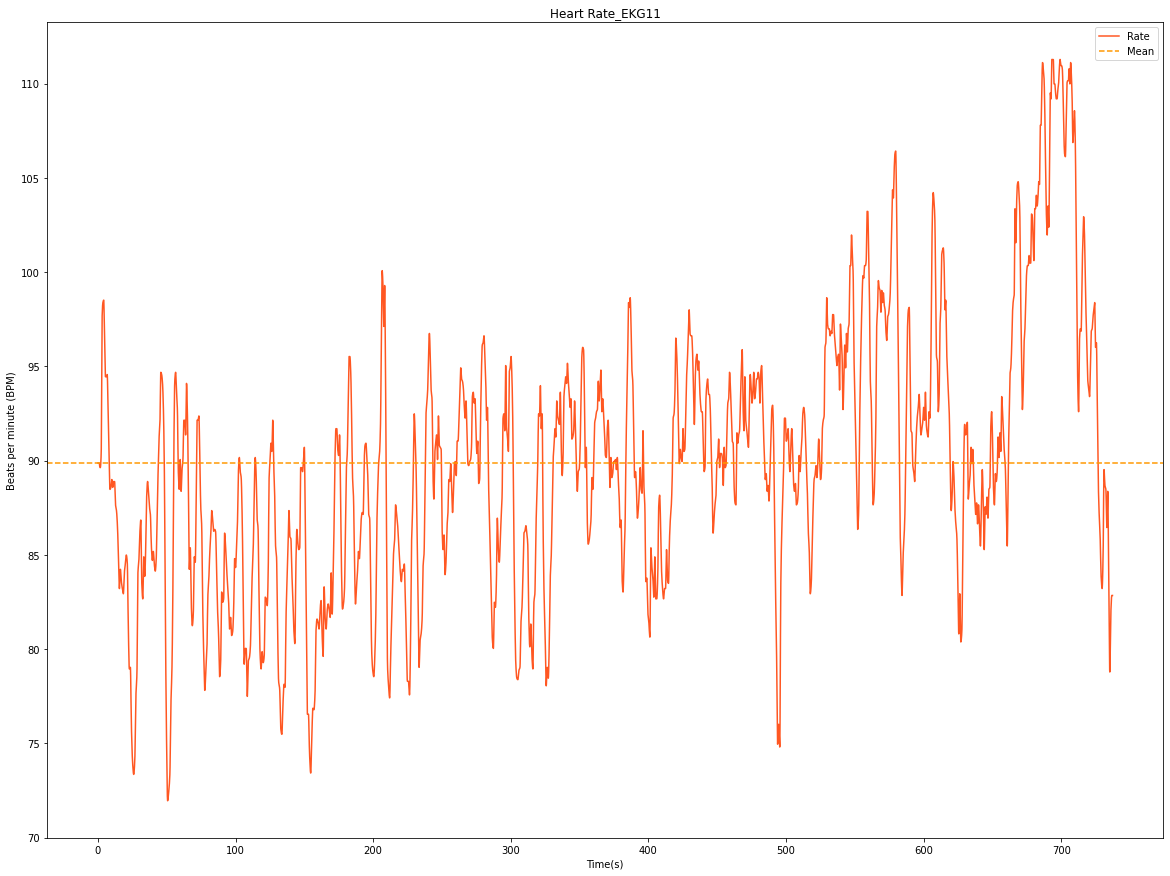

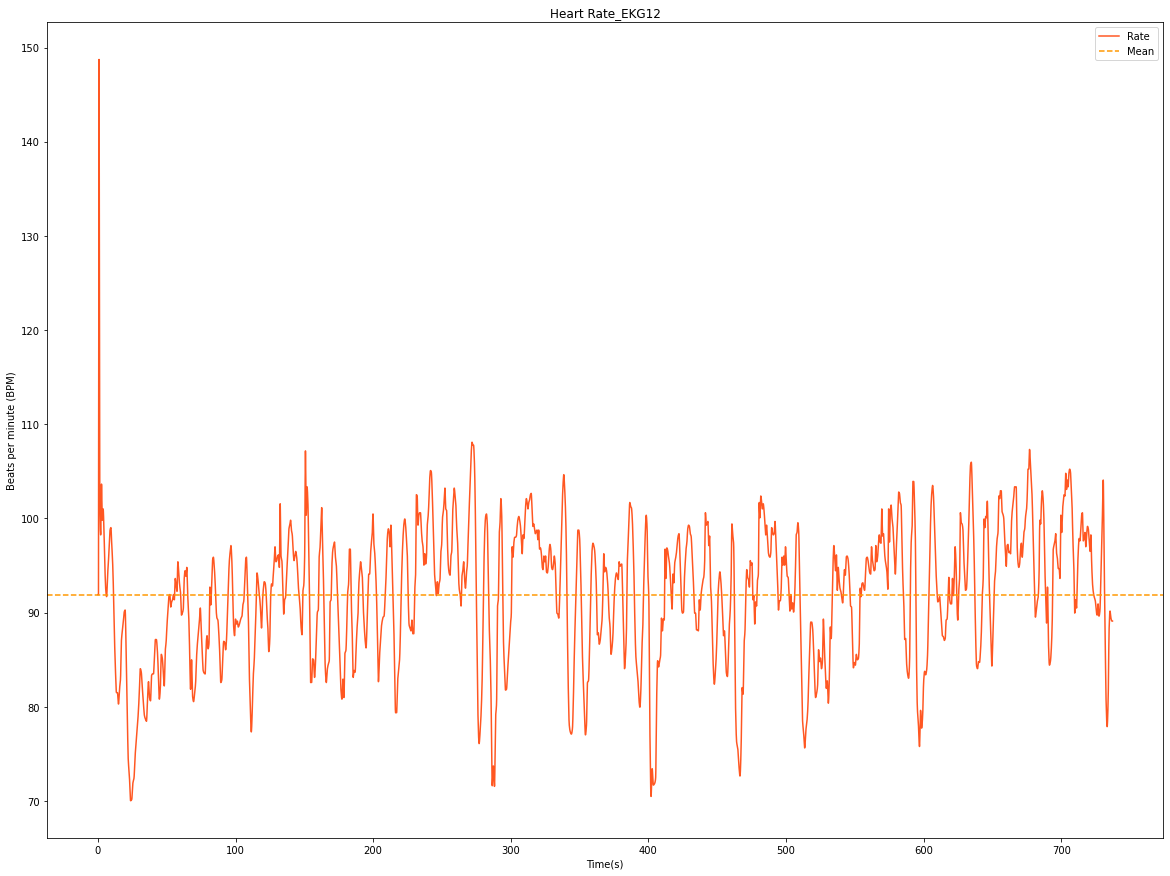

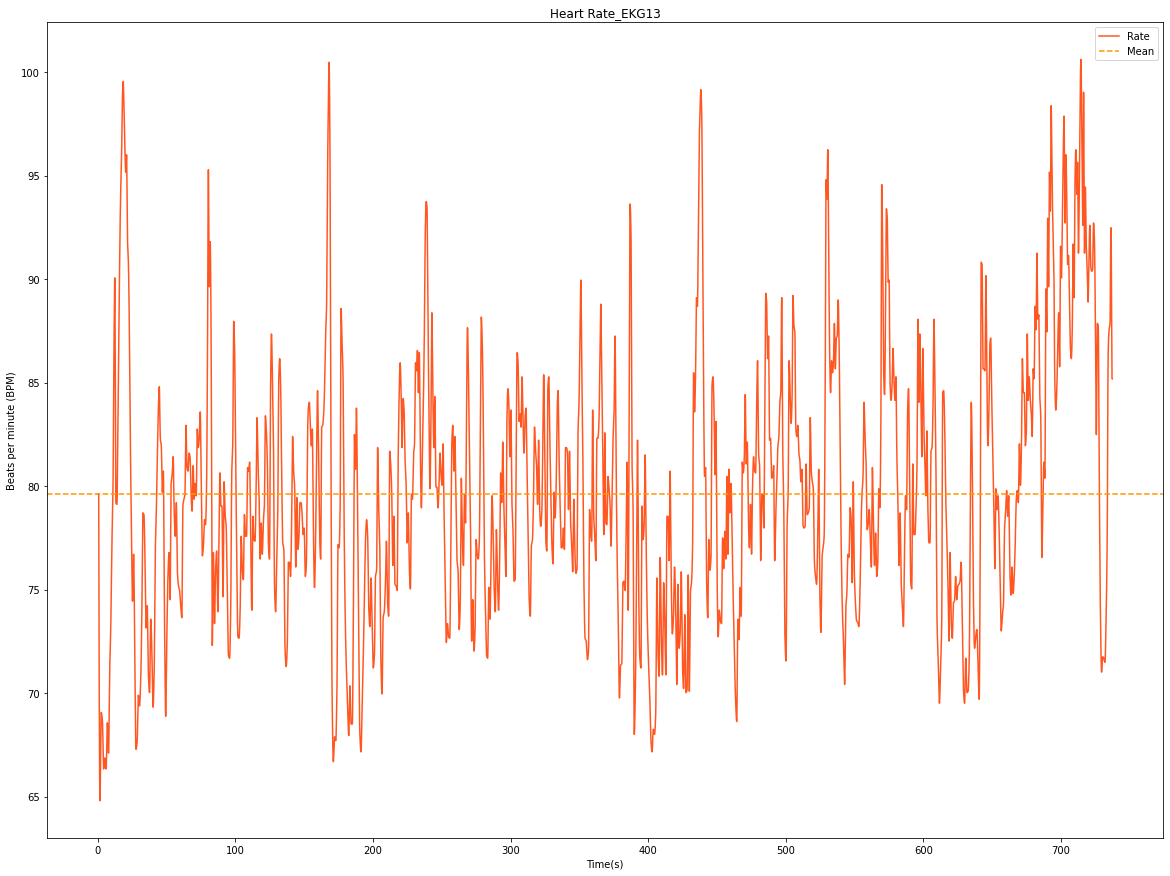

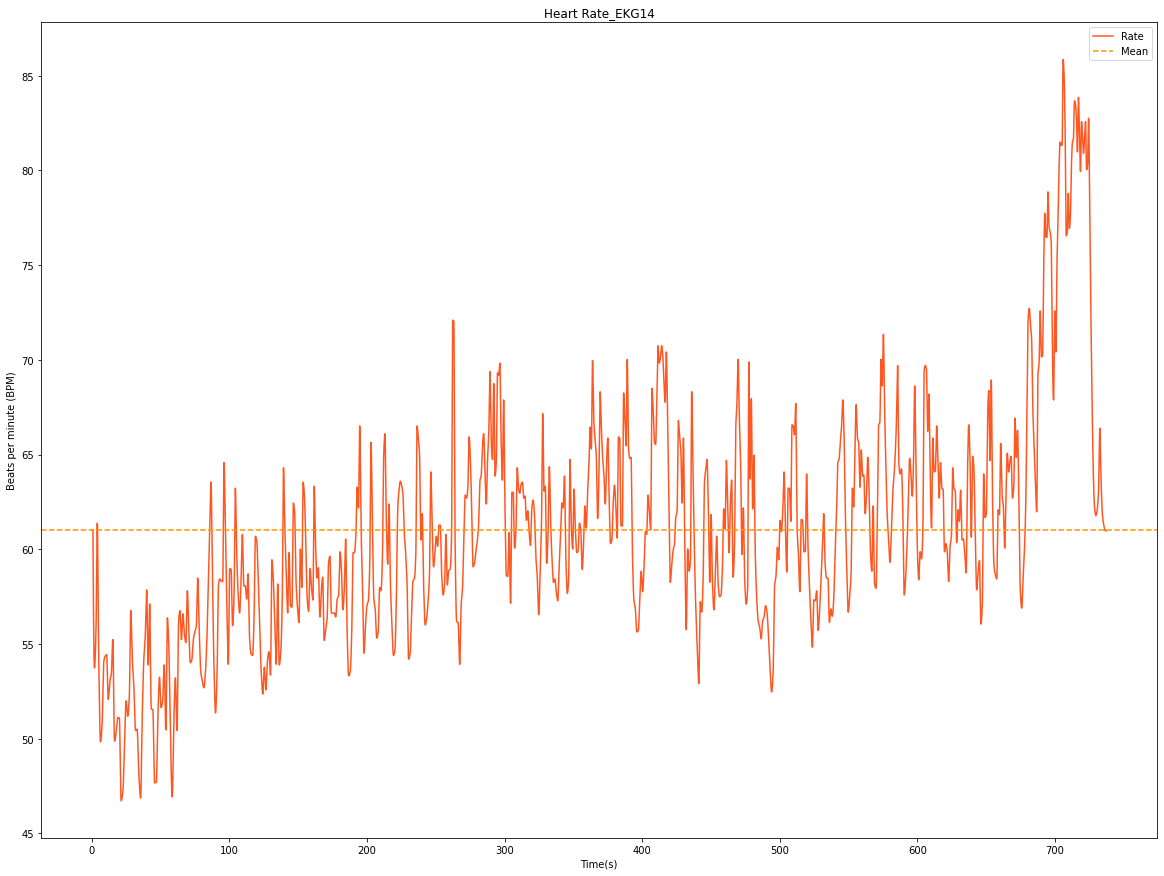

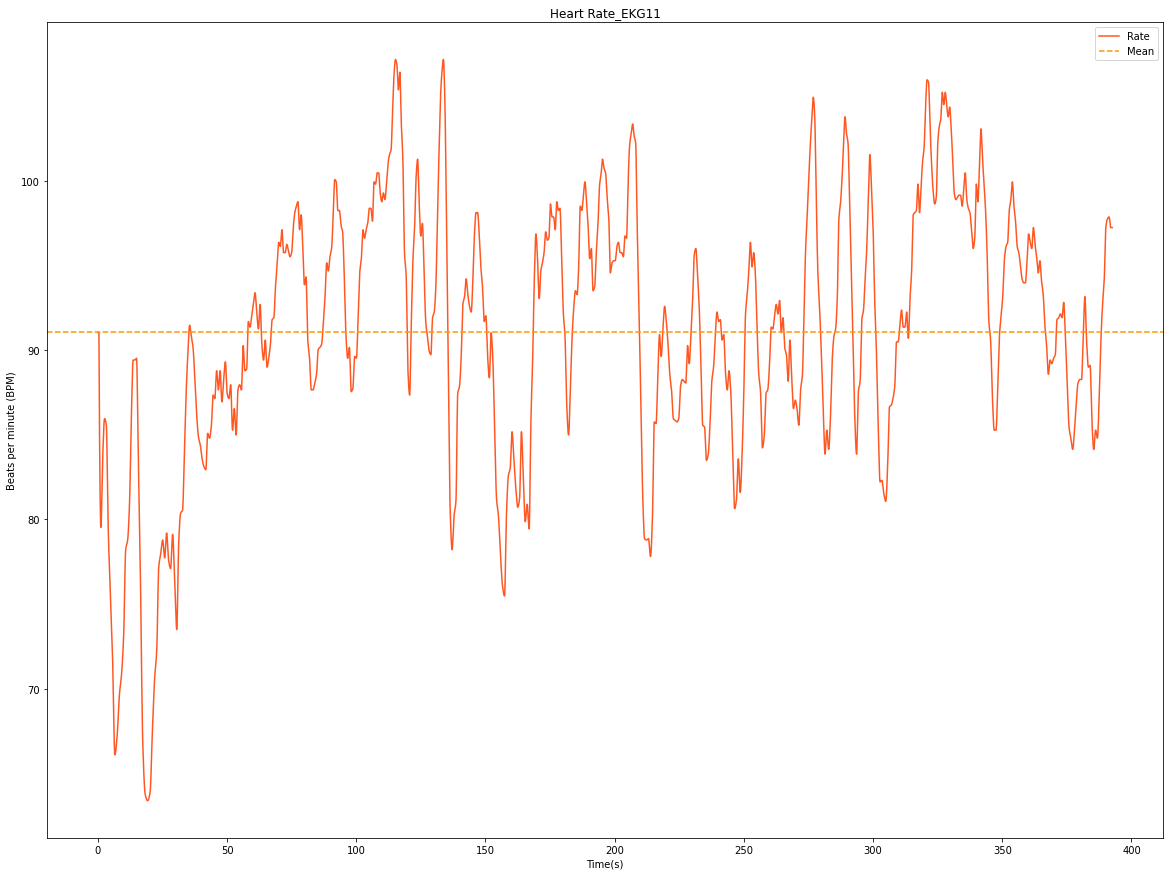

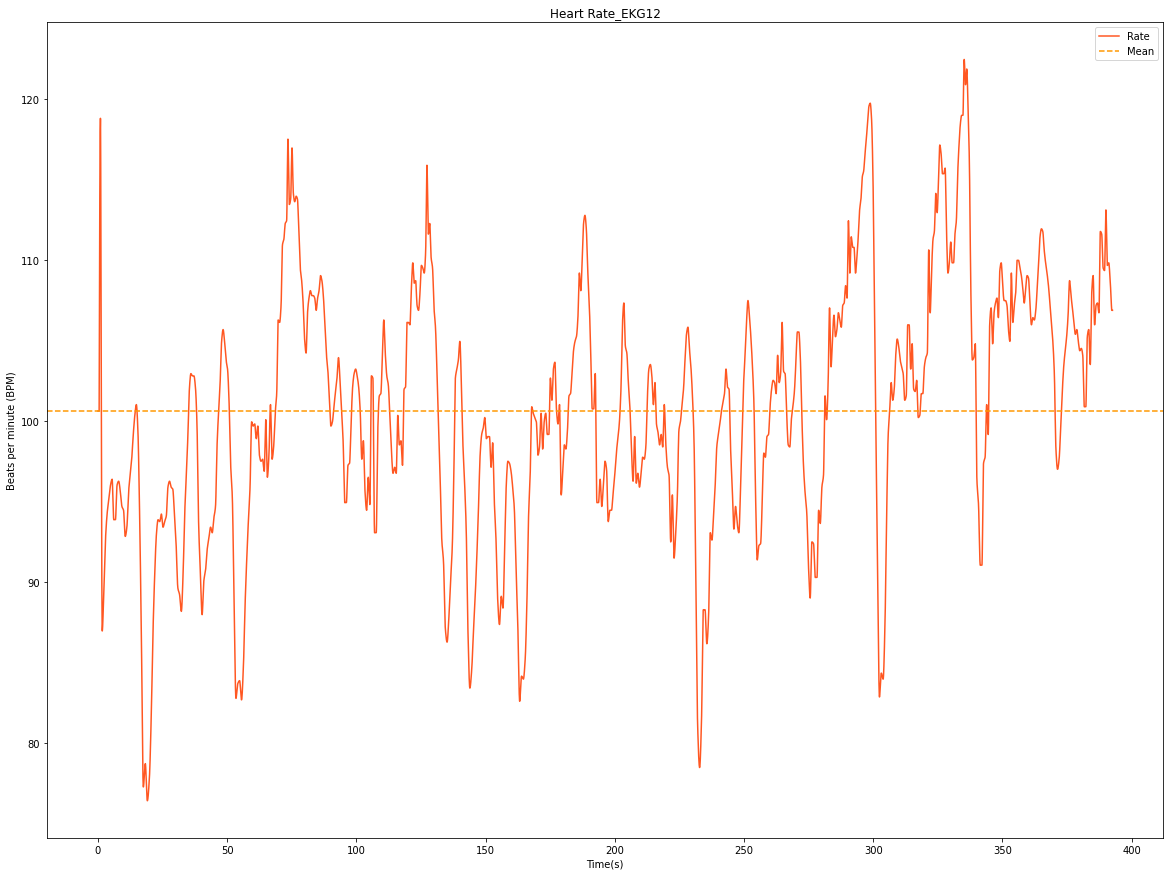

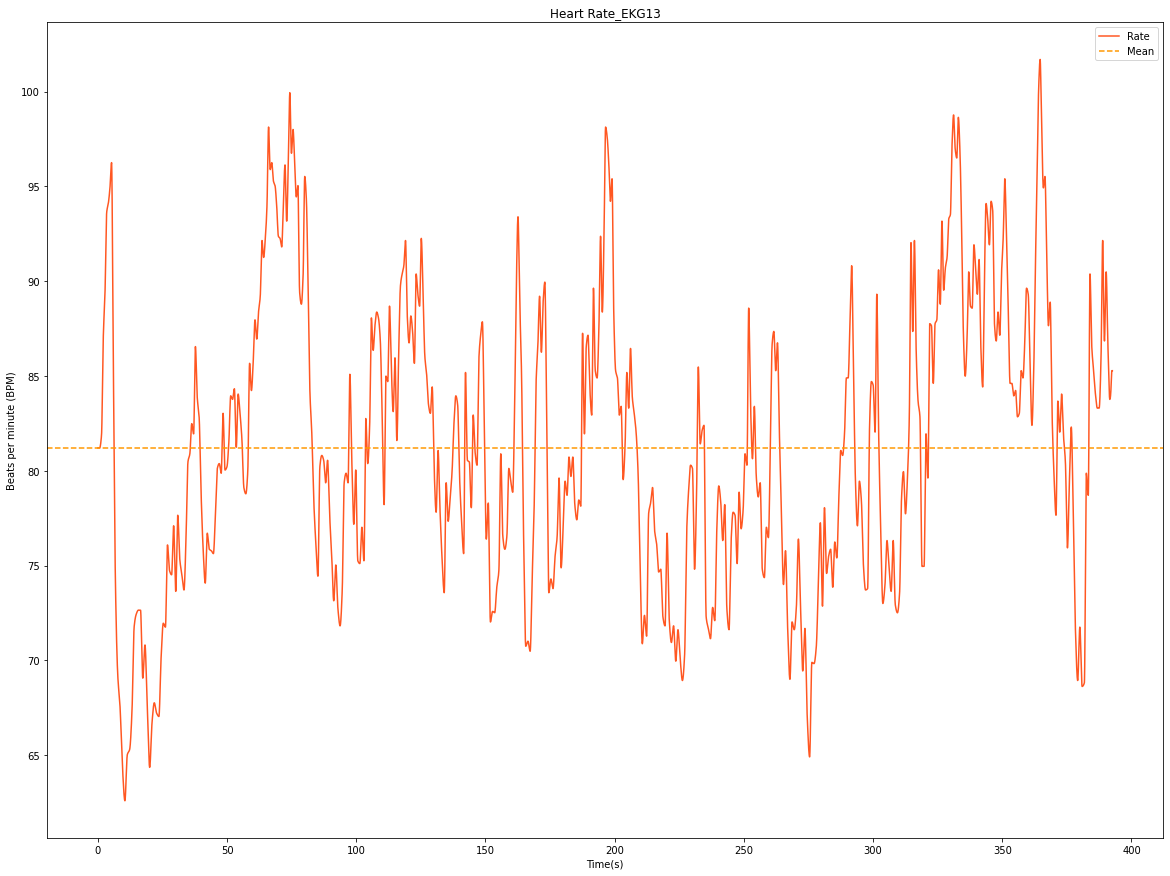

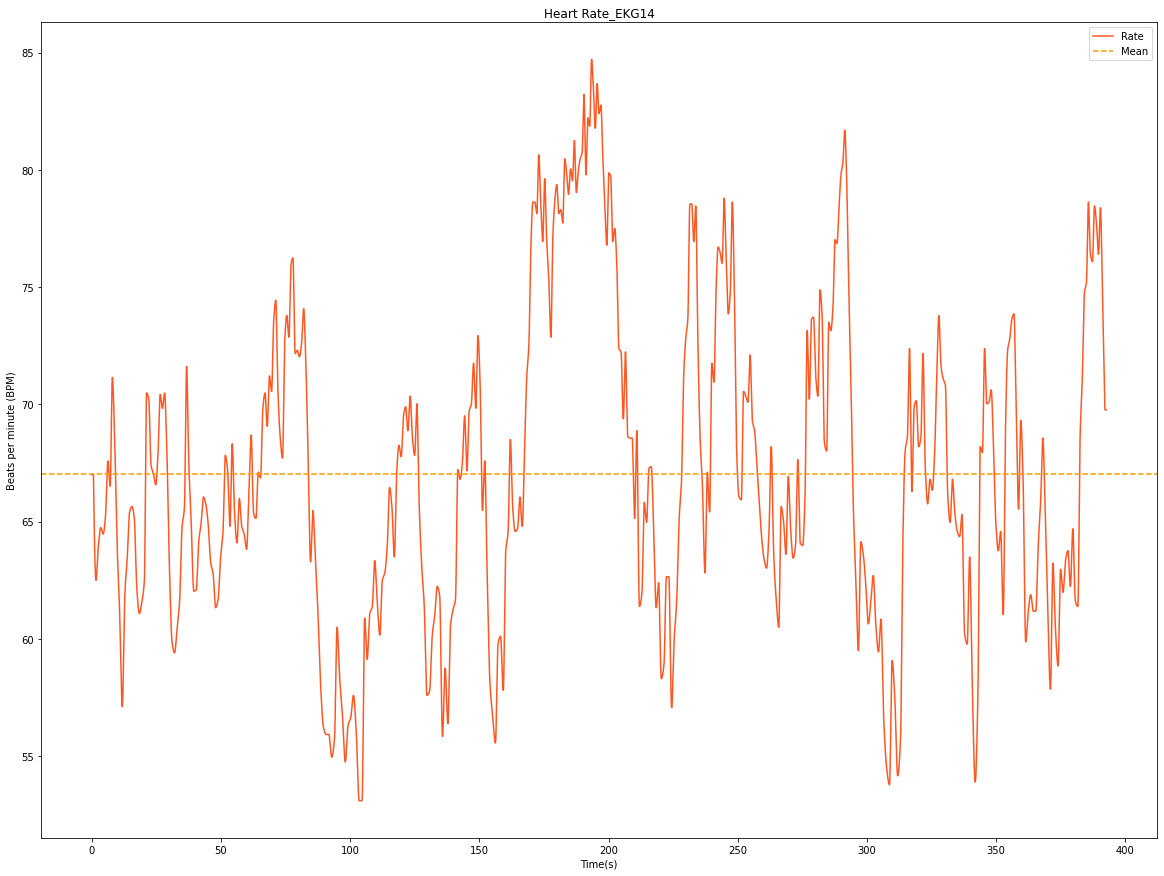

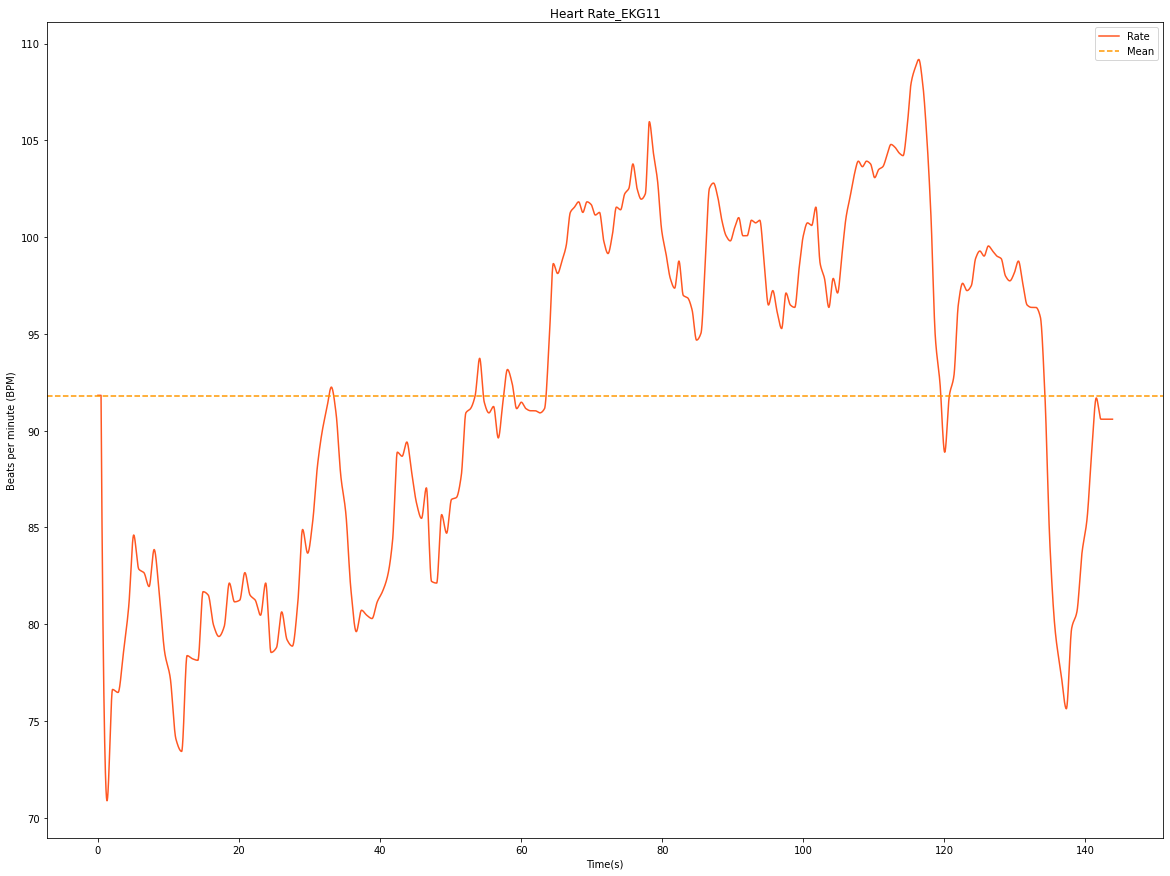

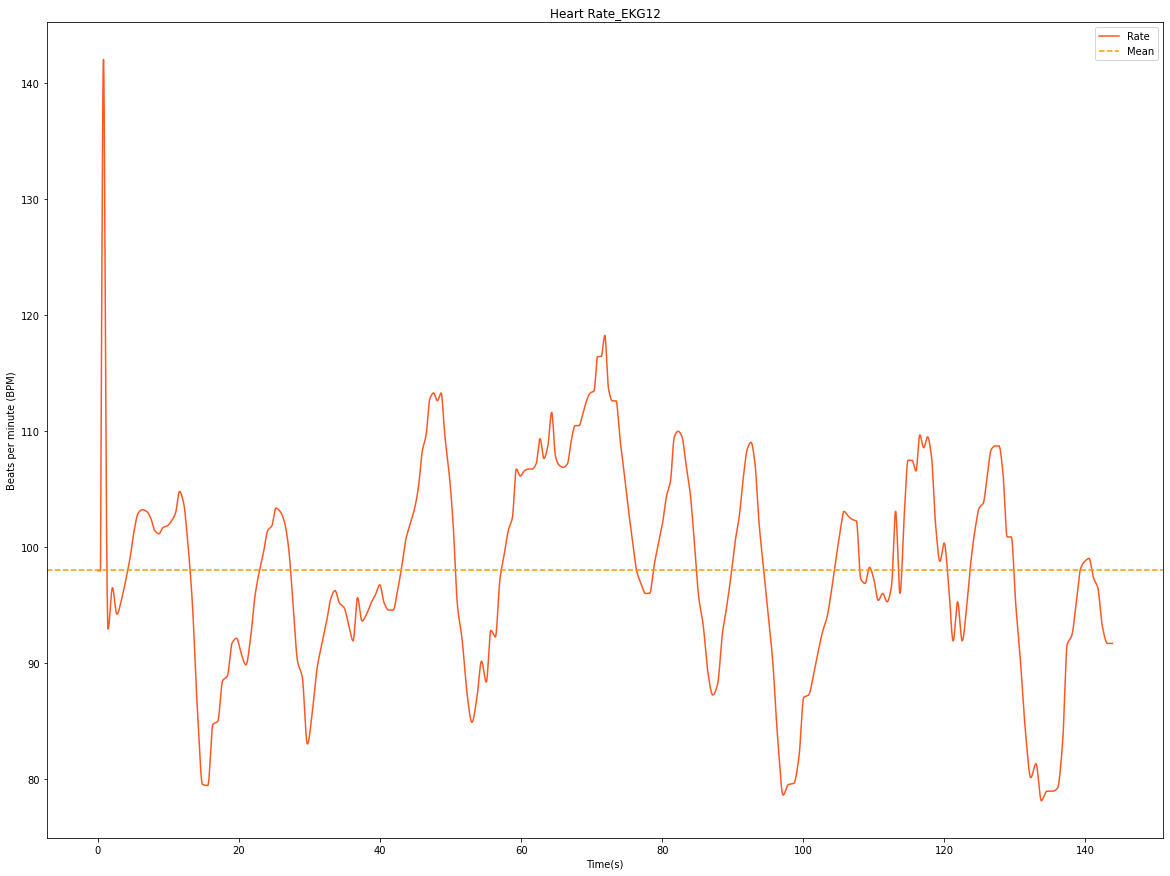

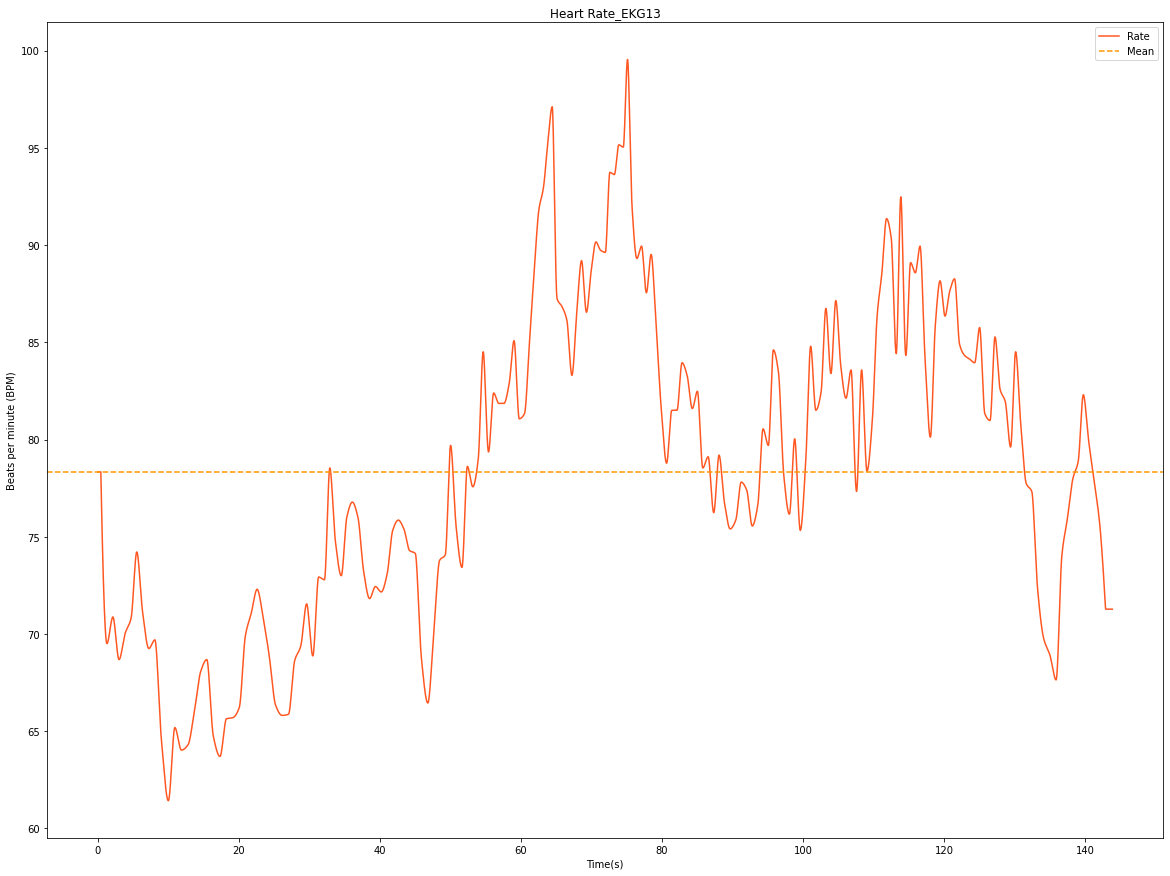

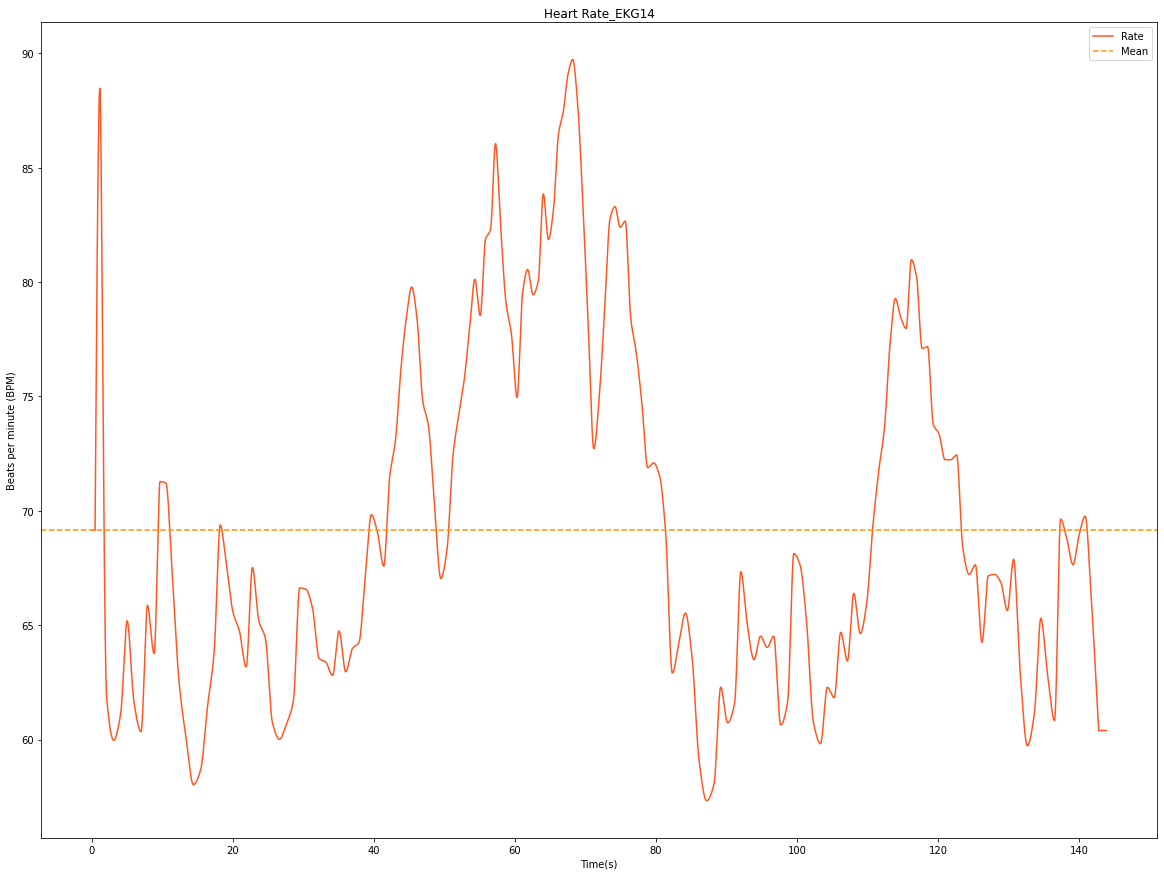

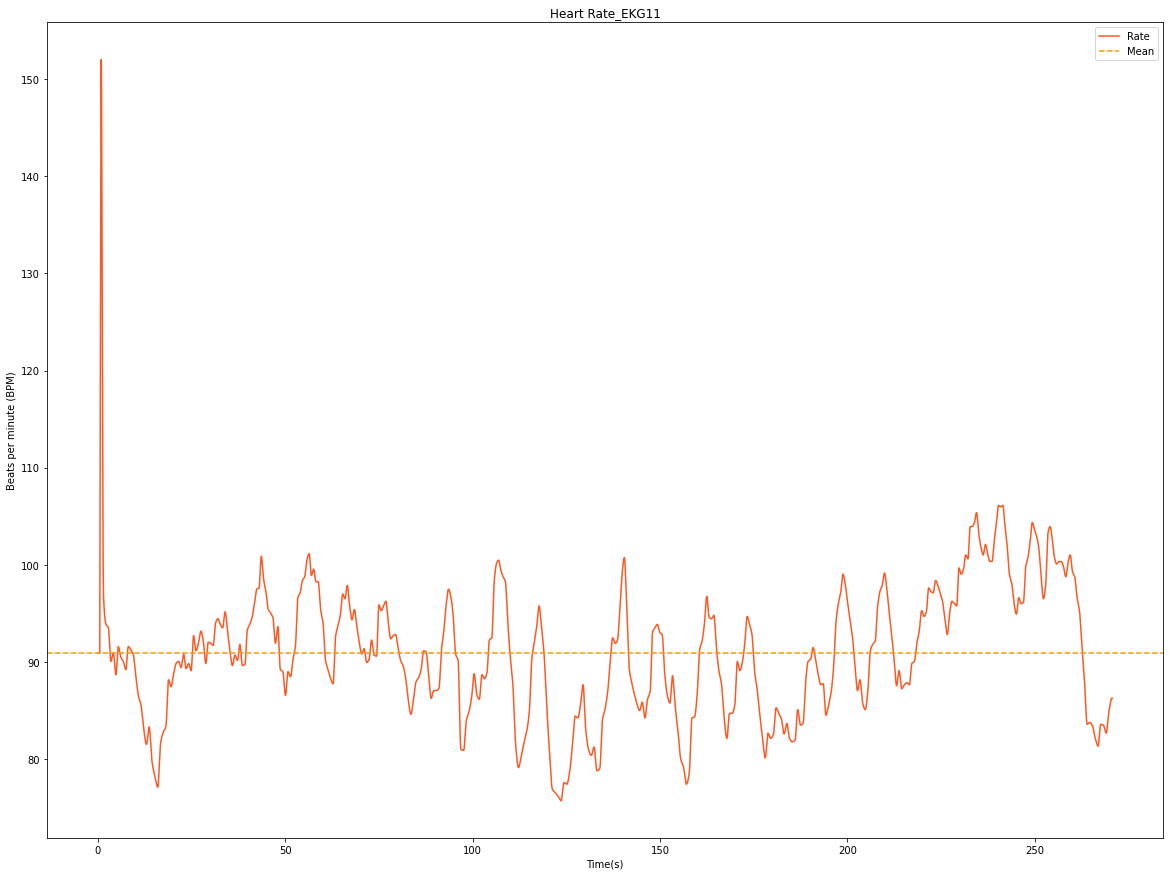

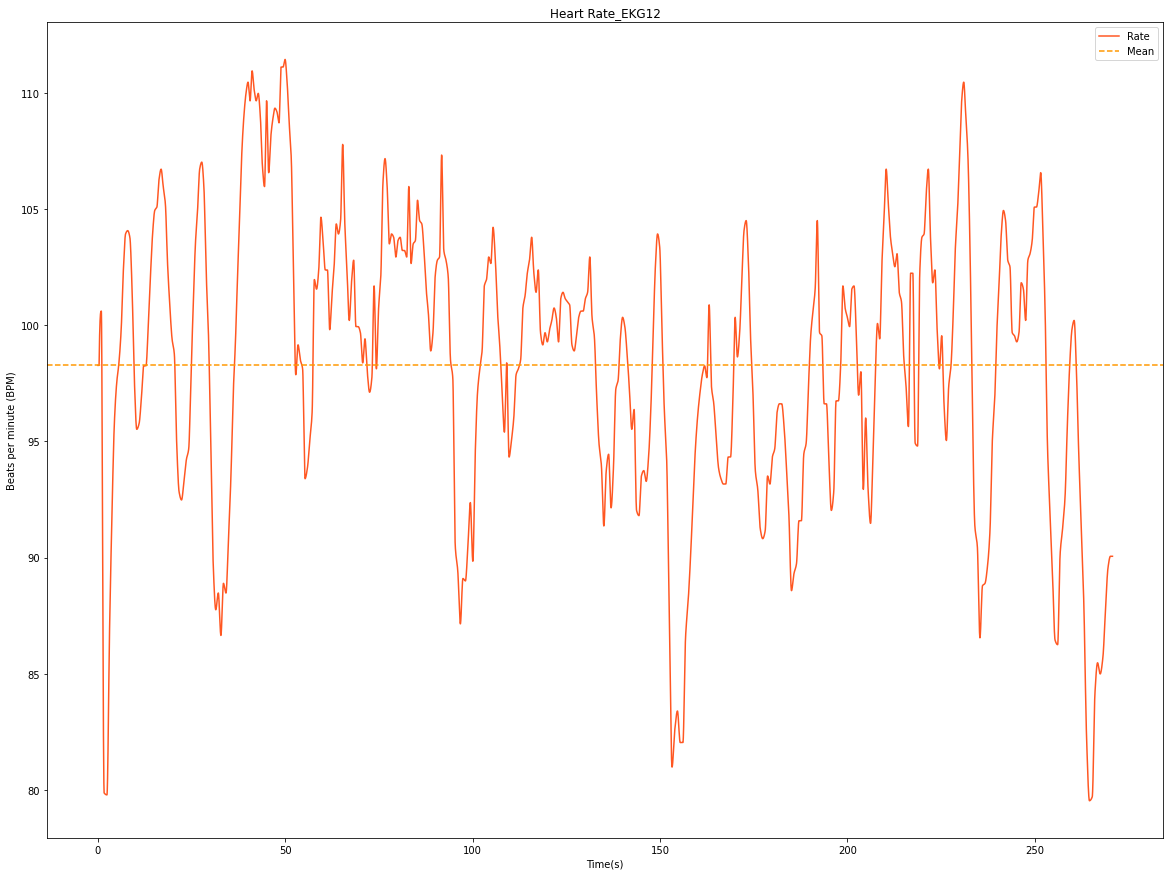

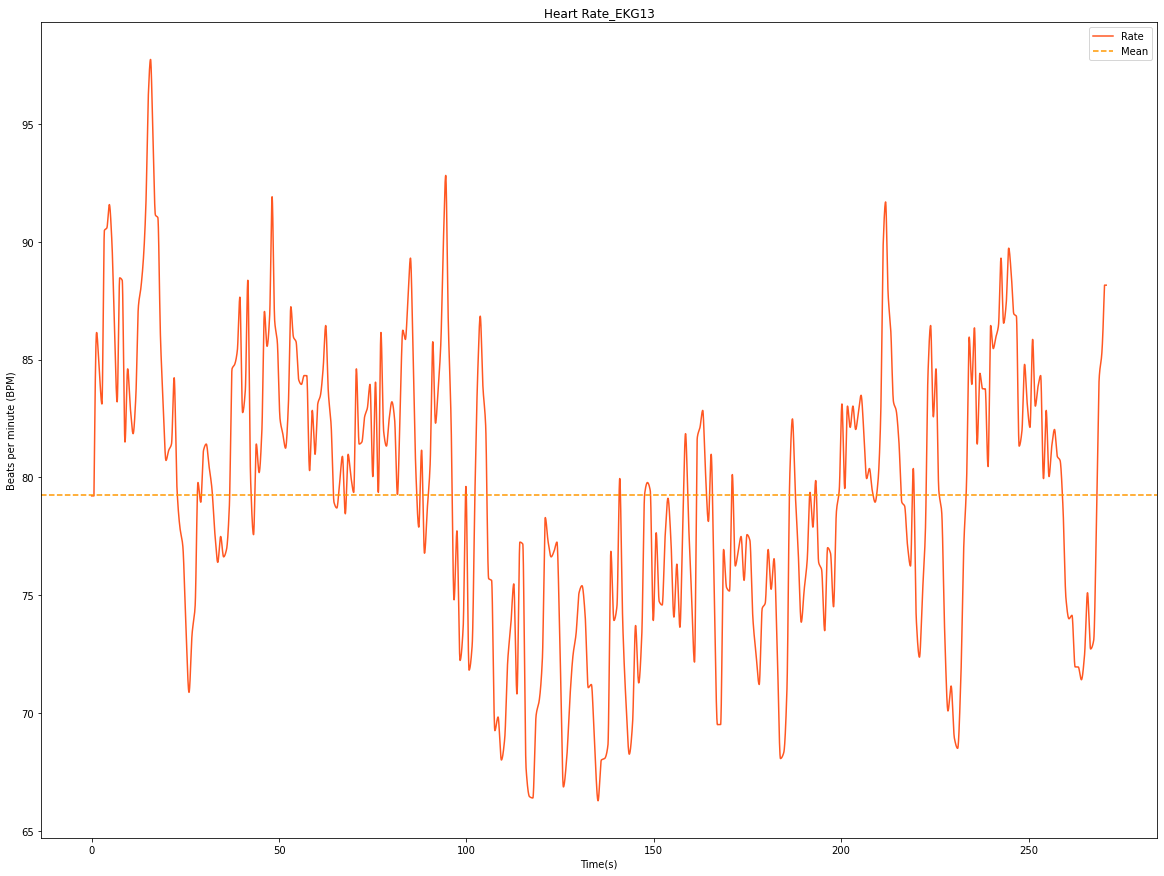

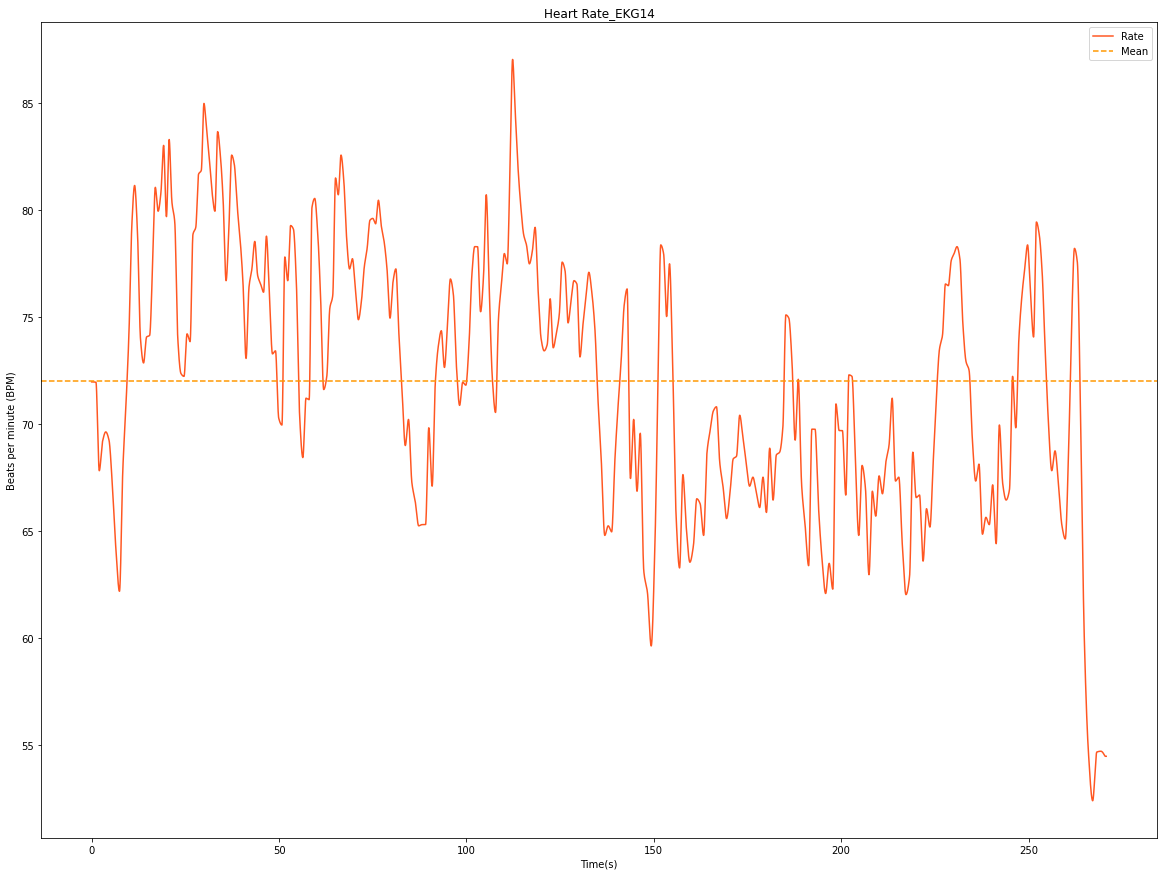

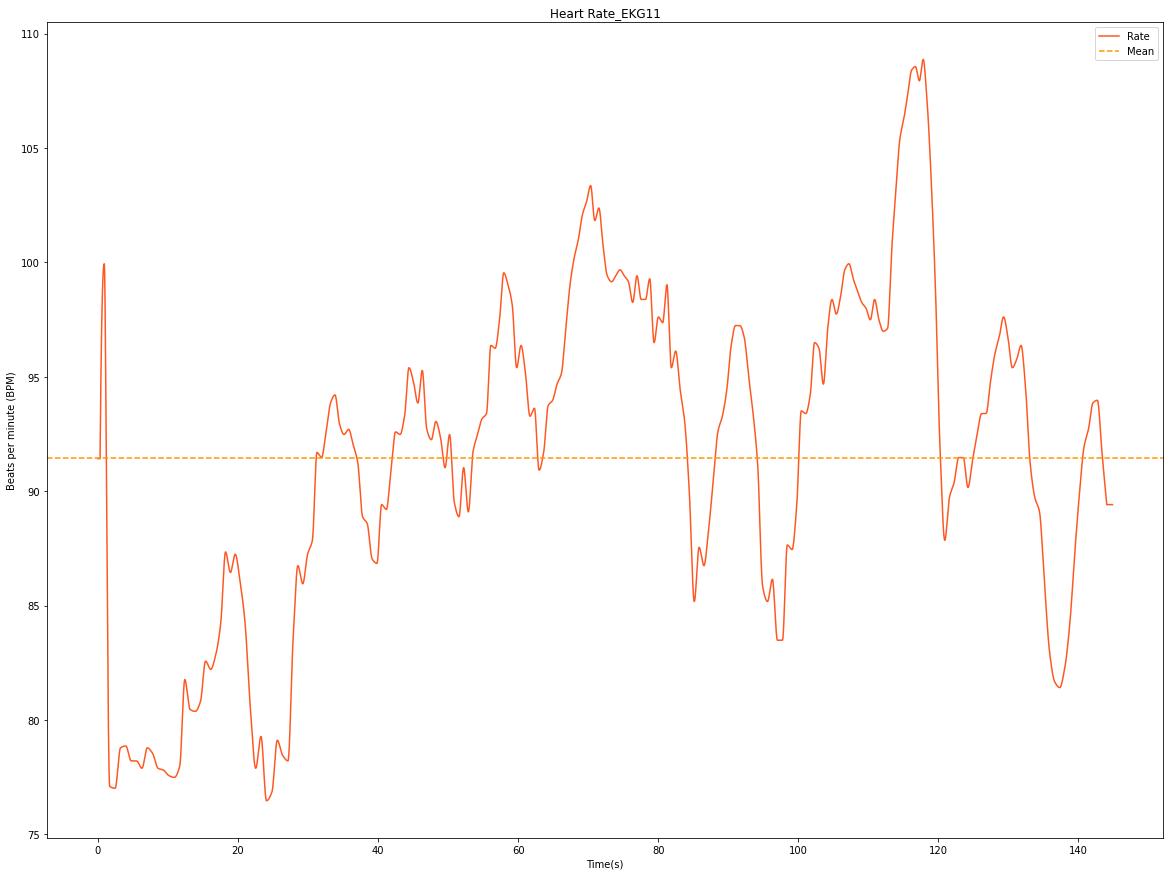

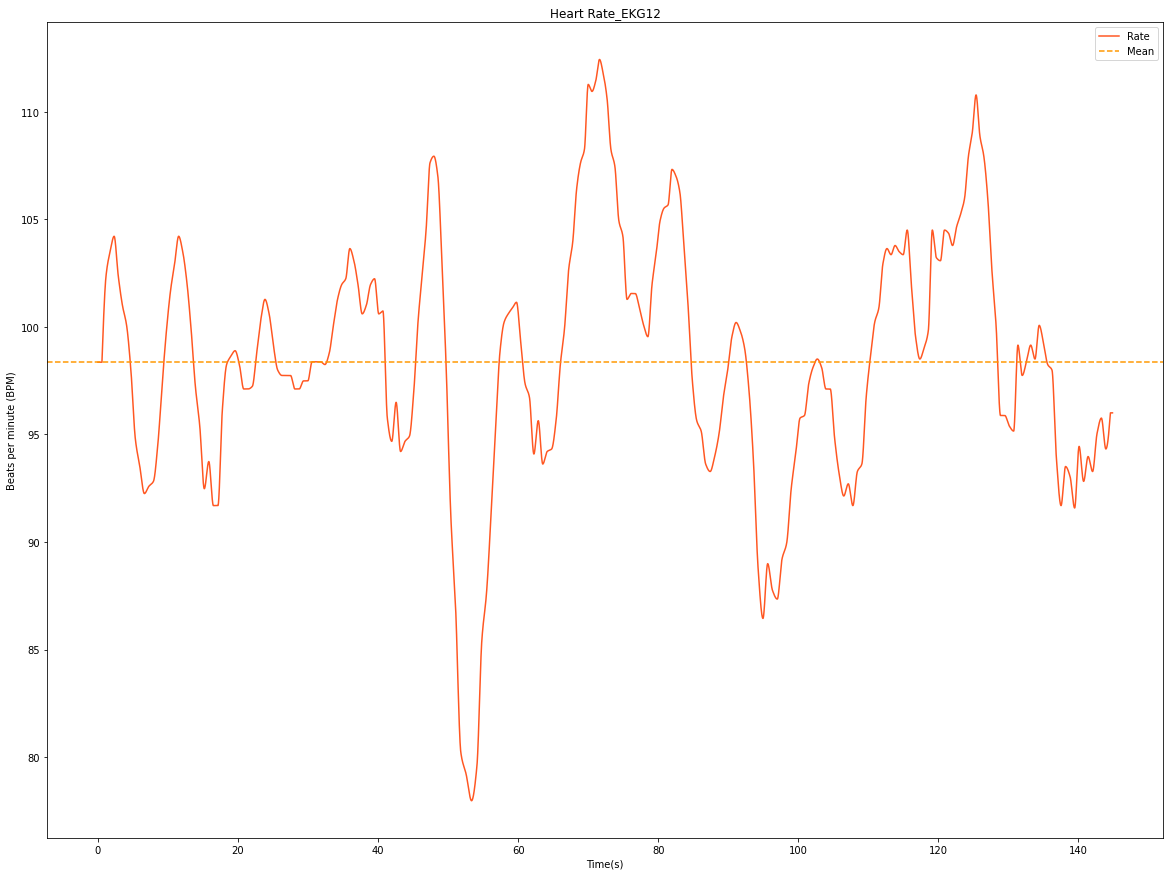

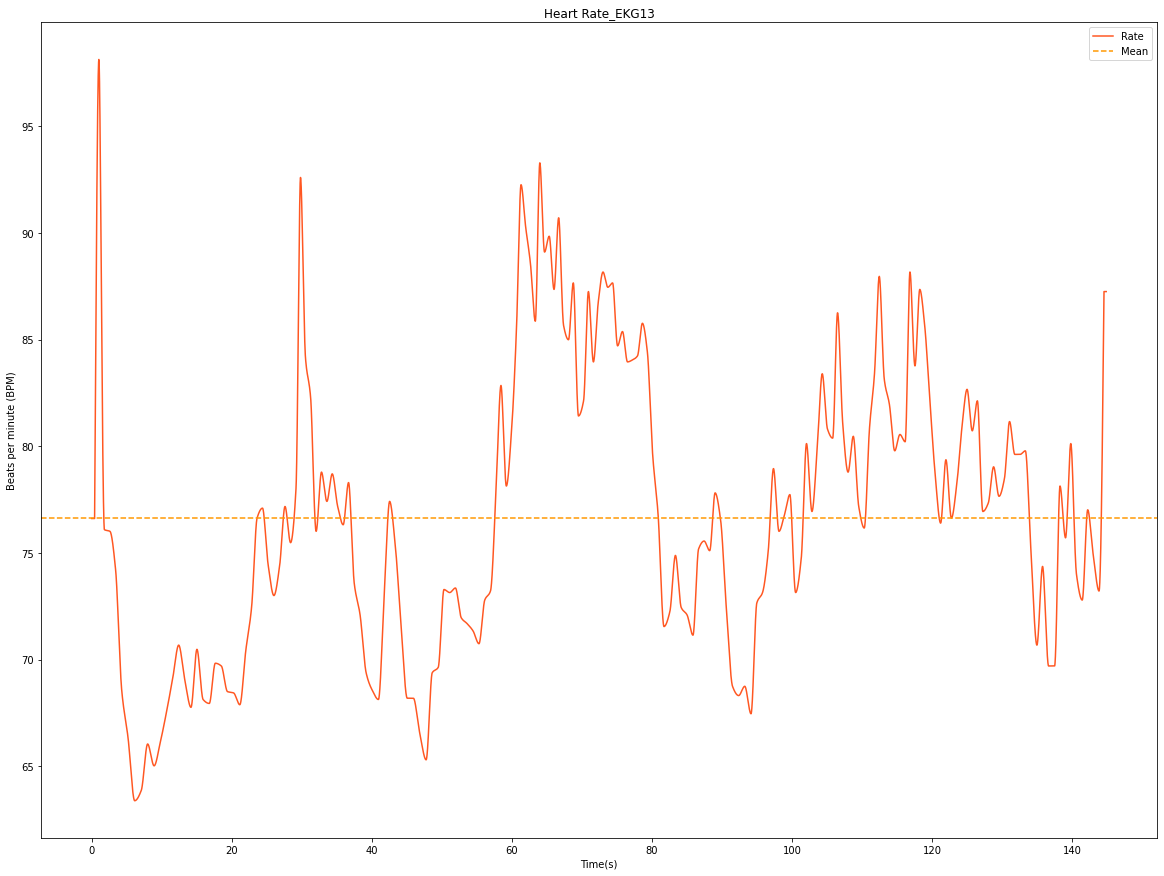

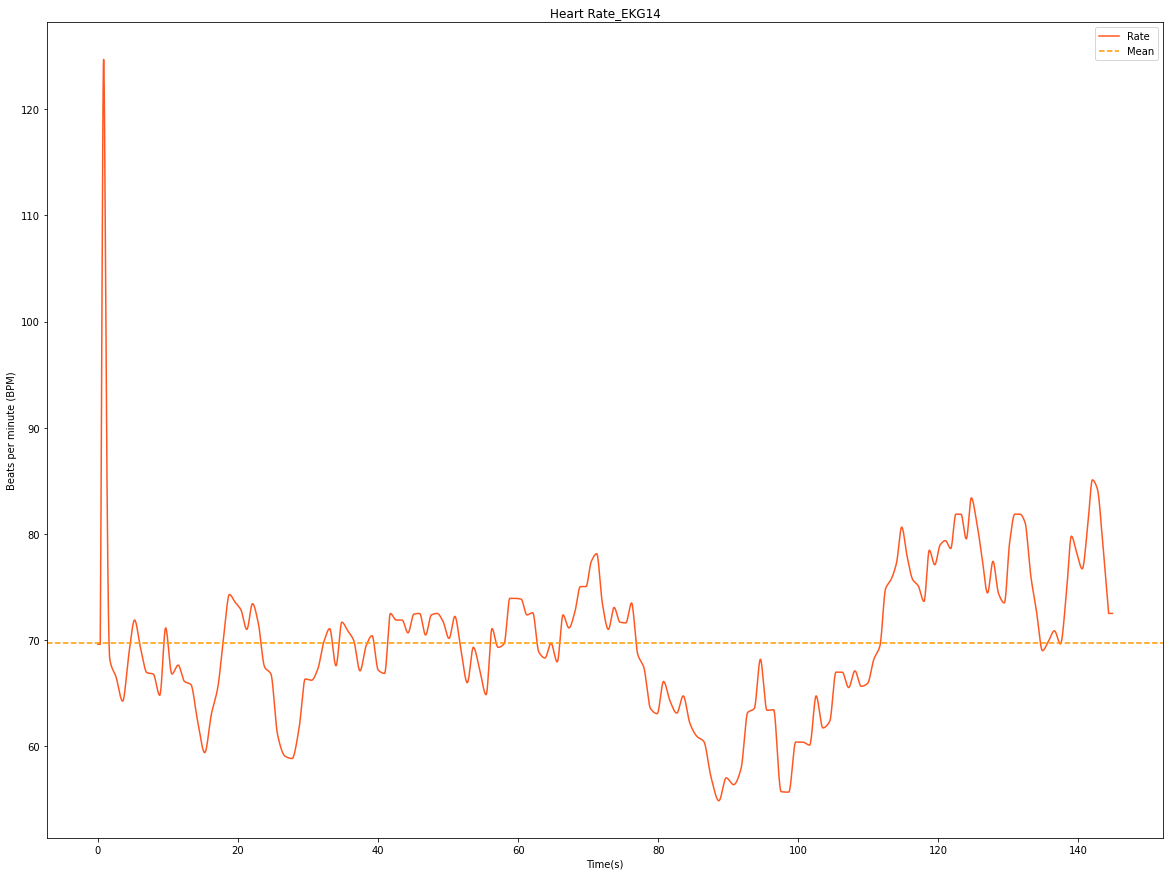

In [8]:
Rminl,Rmaxl,Rmeanl,Rdevl = [],[],[],[]
filelist = []
for filename in filtered_files:
    dataframe = pd.read_csv('./test/'+filename, sep=',',skiprows=200) 
    E11,E12,E13,E14,sr = CSVprocess(dataframe)
    S11,S12,S13,S14 = neurokit(E11,E12,E13,E14,sr)
    HRPlot(filename,S11,sr,'_EKG11')
    HRPlot(filename,S12,sr,'_EKG12')
    HRPlot(filename,S13,sr,'_EKG13')
    HRPlot(filename,S14,sr,'_EKG14')
    RR(filename,S11,sr,'cello')
    RR(filename,S12,sr,'violin2')
    RR(filename,S13,sr,'viola')
    RR(filename,S14,sr,'violin1')
    R1,R2,R3,R4 = ult(S11)
    R5,R6,R7,R8 = ult(S12)
    R9,R10,R11,R12 = ult(S13)
    R13,R14,R15,R16 = ult(S14)
    Rminl.append(R1)
    Rminl.append(R2)
    Rminl.append(R3)
    Rminl.append(R4)
    filelist.append(filename+'_min')
    Rmaxl.append(R5)
    Rmaxl.append(R6)
    Rmaxl.append(R7)
    Rmaxl.append(R8)
    filelist.append(filename+'_max')
    Rmeanl.append(R9)
    Rmeanl.append(R10)
    Rmeanl.append(R11)
    Rmeanl.append(R12)
    filelist.append(filename+'_mean')
    Rdevl.append(R13)
    Rdevl.append(R14)
    Rdevl.append(R15)
    Rdevl.append(R16)
    filelist.append(filename+'_dev')

newcsv = pd.DataFrame(filelist, columns=['filename'])
newcsv['EKG_11'] = Rminl
newcsv['EKG_12'] = Rmaxl
newcsv['EKG_13'] = Rmeanl
newcsv['EKG_14'] = Rdevl
newcsv.to_csv('ULT.csv')
    
    